**Install Requirred Libraries**

In [25]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Importing Libraries and Loading Dataset**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Displaying Initial Data Structure and Basic Summary**

In [27]:
df = pd.read_csv('ifood_df.csv')
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


**Handling missing or Inconssistent Data**

In [28]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


**Data Cleaning and Feature Engineering**

In [29]:
columns_to_drop=['Z_CostCintact','Z_Revenue']
df = df.drop([col for col in columns_to_drop if col in df.columns],axis=1,inplace = False)
df.ffill(inplace=True)
df['TotalPurchases']= df['NumDealsPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['TotalSpent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

**Descriptive Statistics and Metrics**

In [30]:
average_purchase_value= df['TotalSpent'].mean()
purchase_frequency=df['TotalPurchases'].mean()
print(f'Average Purchase Value:{average_purchase_value}')
print(f'Purchase Frequency : {purchase_frequency}')
df[['Income','Age','TotalSpent','TotalPurchases']].describe()

Average Purchase Value:606.821768707483
Purchase Frequency : 10.787301587301588


,Income,Age,TotalSpent,TotalPurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,51.095692,606.821769,10.787302
std,20713.063826,11.705801,601.675284,5.688019
min,1730.000000,24.000000,5.000000,0.000000
25%,35196.000000,43.000000,69.000000,5.000000
50%,51287.000000,50.000000,397.000000,10.000000
75%,68281.000000,61.000000,1047.000000,15.000000
max,113734.000000,80.000000,2525.000000,43.000000


**Customer Segmentation using K-Means Clustering**

In [31]:
features = df[['Income','Age','TotalSpent','TotalPurchases','NumWebVisitsMonth','Recency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4,random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster'].value_counts()

Cluster
1    757
3    521
2    493
0    434
Name: count, dtype: int64

**Visuvalization of Clusters**

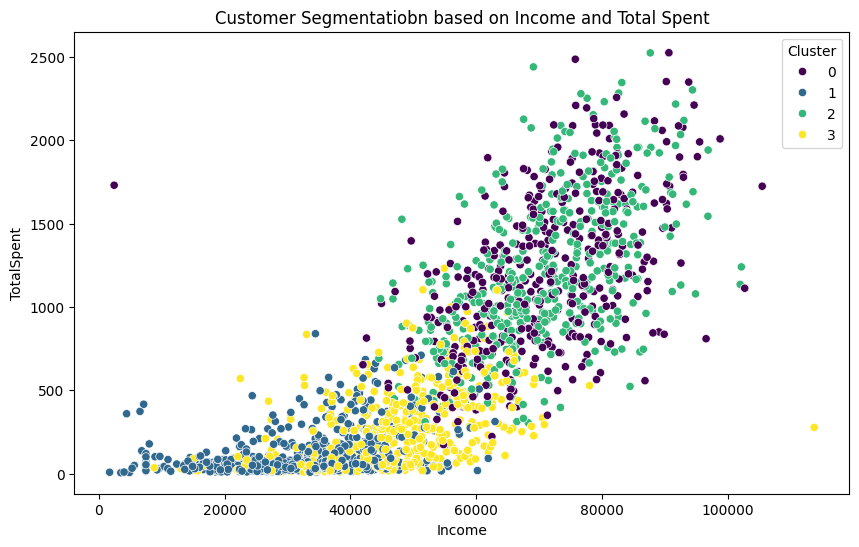

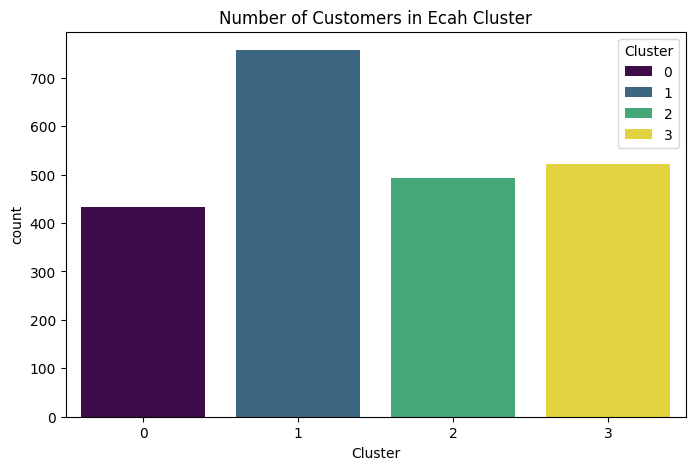

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income',y='TotalSpent',hue='Cluster',data=df,palette='viridis')
plt.title('Customer Segmentatiobn based on Income and Total Spent')
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster',data=df,hue='Cluster',palette='viridis')
plt.title('Number of Customers in Ecah Cluster')
plt.show()

**Insights and Recommendations**

In [34]:
cluster_analysis=df.groupby('Cluster').mean()[['Income','Age','TotalSpent','TotalPurchases','NumWebVisitsMonth','Recency']]
print(cluster_analysis)

               Income        Age   TotalSpent  TotalPurchases  \
Cluster                                                         
0        71033.702765  50.541475  1193.373272       16.059908   
1        31607.733157  42.826948   112.804491        5.896962   
2        70766.221095  53.701826  1201.300203       15.853955   
3        46417.065259  61.105566   273.481766        8.706334   

         NumWebVisitsMonth    Recency  
Cluster                                
0                 3.847926  22.400922  
1                 6.943197  49.664465  
2                 3.651116  73.703854  
3                 5.838772  46.854127  


**Optimizing K-Means Clustering (Elbow Method or Silhouette Score)**

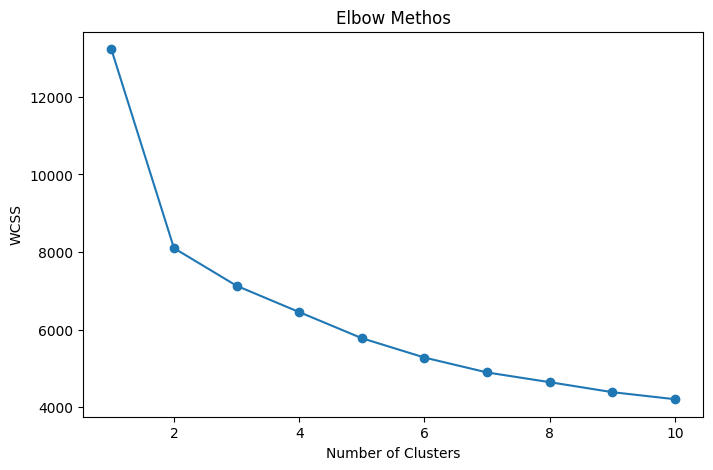

In [35]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Methos')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.3390836291666717
For n_clusters=3, the silhouette score is 0.21847357889355493
For n_clusters=4, the silhouette score is 0.19649779194566286
For n_clusters=5, the silhouette score is 0.20159547612720655


**Segmentation Using Different Clustering Algorithms**

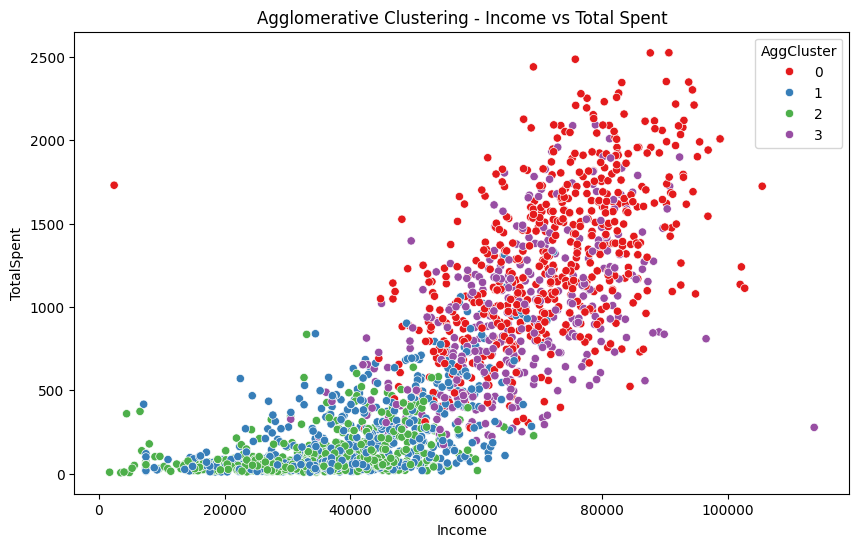

In [40]:
from sklearn.cluster import AgglomerativeClustering
# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)
df['AggCluster'] = agg_clust.fit_predict(scaled_features)
# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='TotalSpent', hue='AggCluster',data=df, palette='Set1')
plt.title('Agglomerative Clustering - Income vs Total Spent')
plt.show()

**Customer Lifetime Value (CLV) Analysis**

Cluster
0    19238.433180
1      930.030383
2    19245.663286
3     3049.804223
Name: CLV, dtype: float64


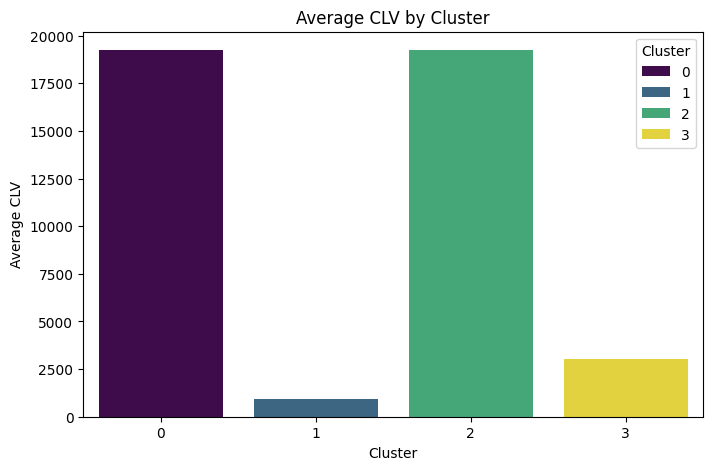

In [42]:
# Calculate Customer Lifetime Value (CLV) based on a simplified formula
df['CLV'] = df['TotalSpent'] * df['TotalPurchases']
# Analyze CLV for each cluster
clv_by_cluster = df.groupby('Cluster')['CLV'].mean()
print(clv_by_cluster)
# Visualize CLV distribution by cluster
plt.figure(figsize=(8,5))
sns.barplot(x=clv_by_cluster.index, y=clv_by_cluster.values, hue=clv_by_cluster.index, palette='viridis')
plt.title('Average CLV by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average CLV')
plt.show()

**RFM Analysis (Recency,Frequency,Monetary Value)**

   RFMScore        Income   TotalSpent  TotalPurchases    Recency
0         0  31494.907563    35.638655        3.991597  12.092437
1         1  31223.104046    54.473988        4.526012  29.462428
2         2  34490.795082    98.446721        5.799180  37.127049
3         3  37338.670139   142.010417        6.295139  57.041667
4         4  46842.166667   367.695833        9.166667  49.170833
5         5  57672.667630   700.994220       12.384393  43.893064
6         6  64131.172662   972.176259       14.741007  47.733813
7         7  69018.492308  1173.511538       16.046154  59.315385
8         8  71675.816092  1306.385057       17.252874  75.304598
9         9  73086.843373  1517.795181       18.590361  87.457831


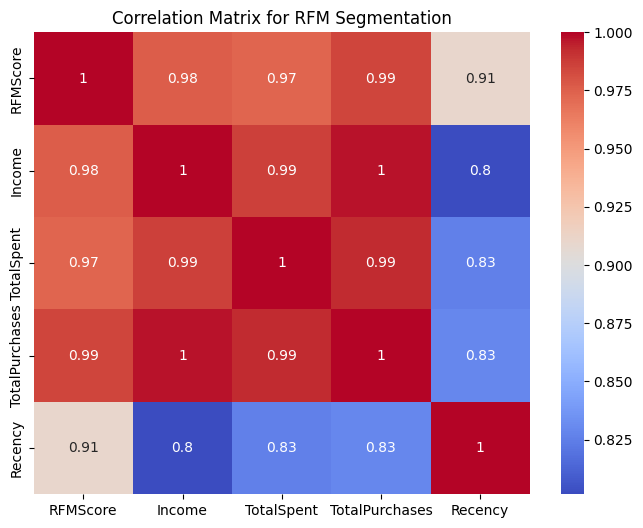

In [44]:
# Create RFM segmentation scores
df['RecencyScore'] = pd.qcut(df['Recency'], 4, labels=False)
df['FrequencyScore'] = pd.qcut(df['TotalPurchases'], 4, labels=False)
df['MonetaryScore'] = pd.qcut(df['TotalSpent'], 4, labels=False)

# Combine RFM scores
df['RFMScore'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Analyzing RFM segments
rfm_analysis = df.groupby('RFMScore').agg({
    'Income': 'mean',
    'TotalSpent': 'mean',
    'TotalPurchases': 'mean',
    'Recency': 'mean'
}).reset_index()

print(rfm_analysis)

# Visualizing RFM scores
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_analysis.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for RFM Segmentation')
plt.show()

**Predictive Modeling**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target selection
X = df[['Income', 'TotalSpent', 'TotalPurchases', 'Recency']]
y = df['Response']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       571
           1       0.53      0.41      0.46        91

    accuracy                           0.87       662
   macro avg       0.72      0.67      0.69       662
weighted avg       0.86      0.87      0.86       662



**Visuvalization:Advanced Plots**

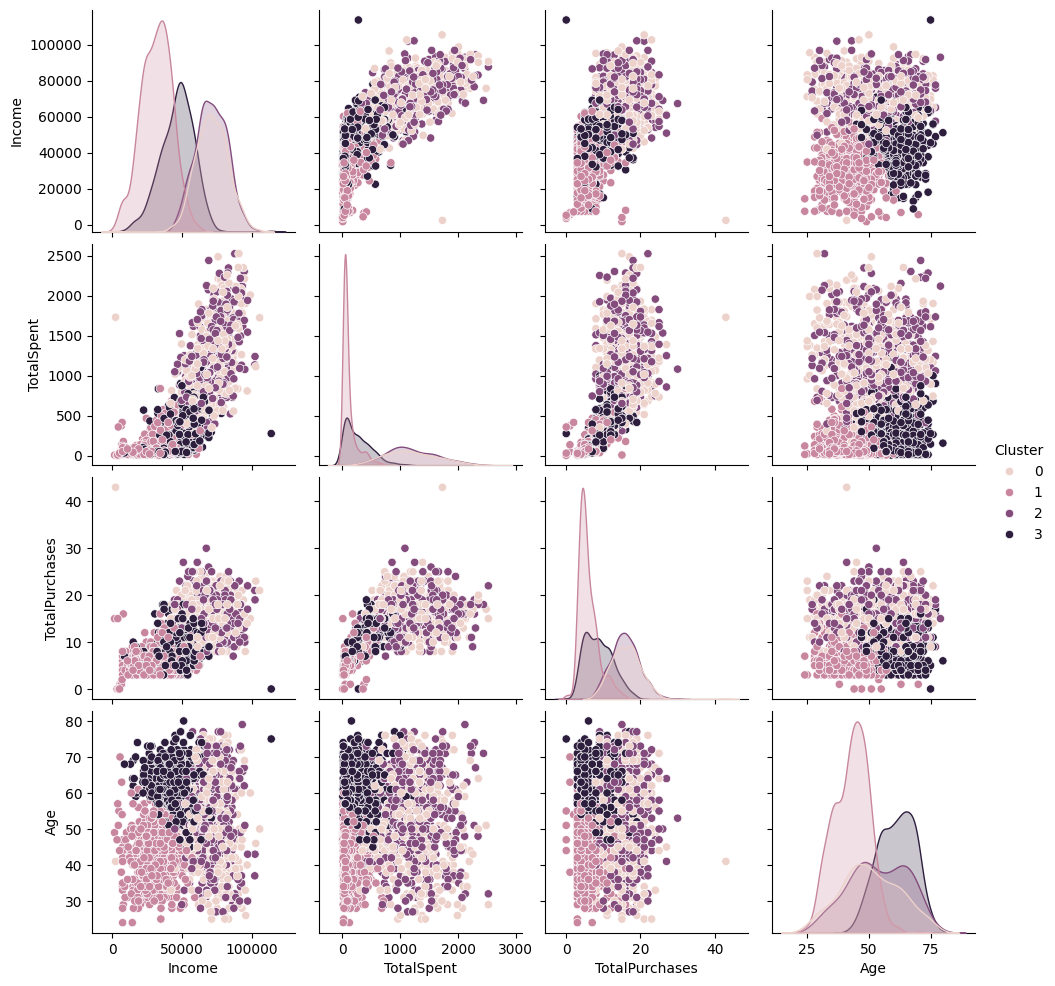

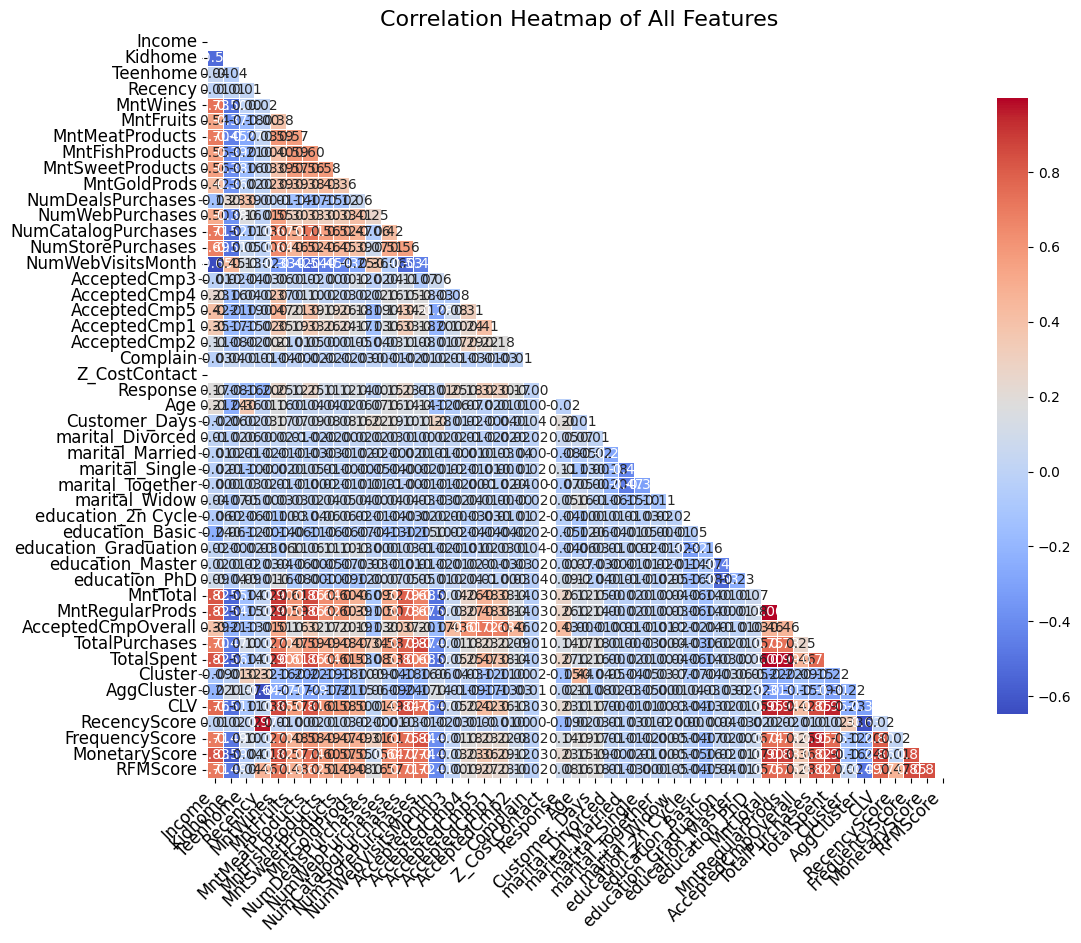

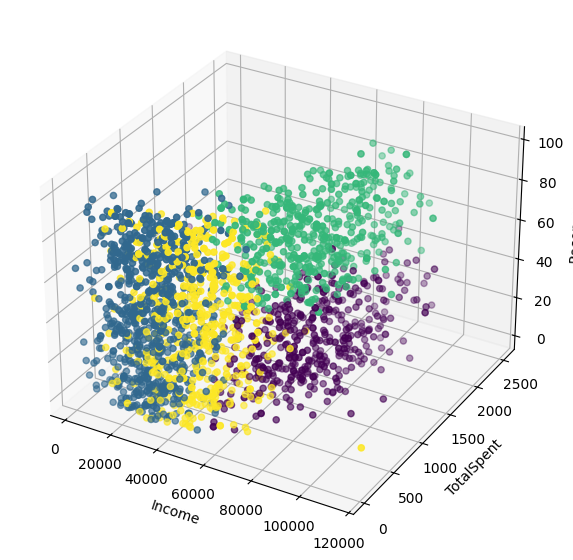

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Pairplot for features by cluster
sns.pairplot(df, hue='Cluster', vars=['Income', 'TotalSpent', 'TotalPurchases', 'Age'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))  # Increased size for better readability
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    mask=mask, 
    cmap='coolwarm', 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .8}, 
    annot_kws={"size": 10}
)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
scatter = ax.scatter(
    df['Income'], df['TotalSpent'], df['Recency'], 
    c=df['Cluster'], cmap='viridis'
)

# Labeling the axes
ax.set_xlabel('Income')
ax.set_ylabel('TotalSpent')
ax.set_zlabel('Recency')

plt.show()


**Dimensionality Reduction**

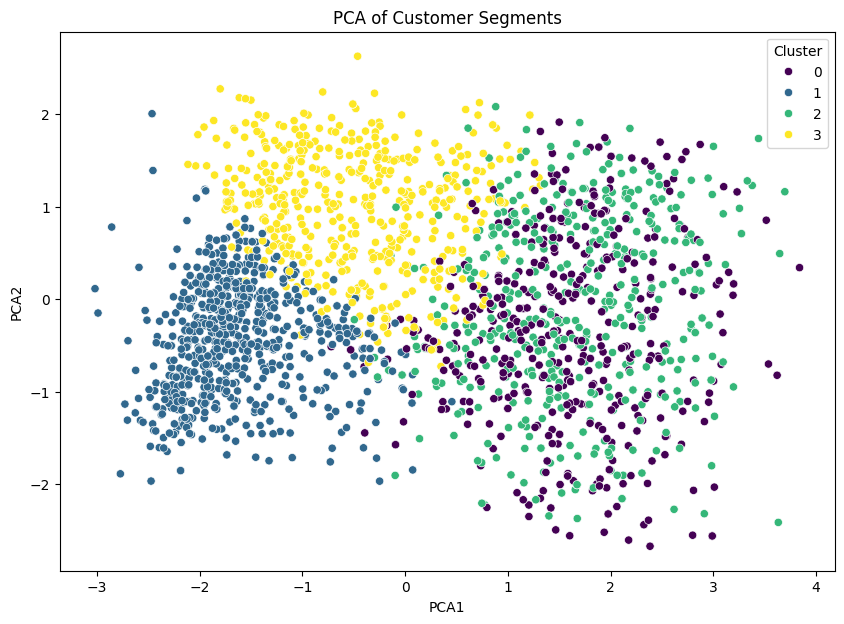

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Income', 'TotalSpent', 'TotalPurchases', 'Age']])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plotting PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title("PCA of Customer Segments")
plt.show()


**Cluster Validation Metrics**

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
db_index = davies_bouldin_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index:{db_index:.3f}')

Silhouette Score: 0.201
Davies-Bouldin Index:5.816


**Detailed Cluster Analysis**

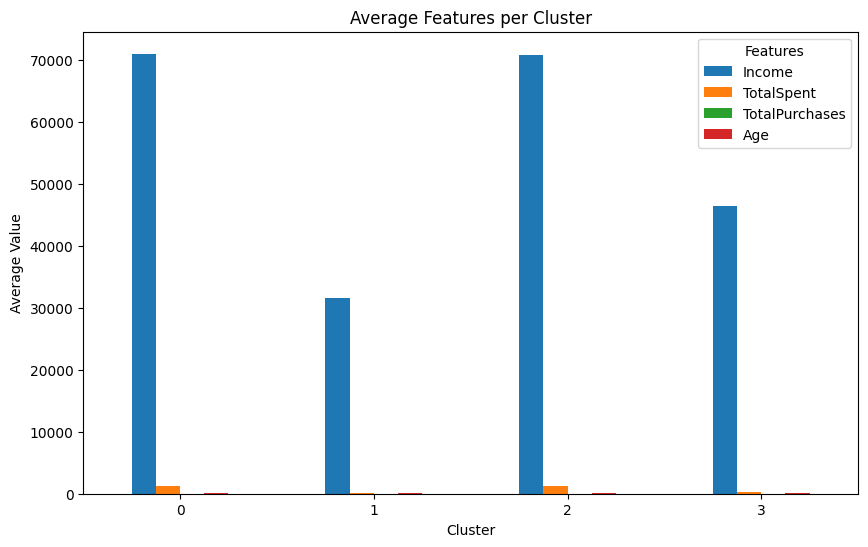

In [46]:
# Group by cluster and calculate mean
cluster_means = df.groupby('Cluster').mean()
cluster_means = cluster_means[['Income', 'TotalSpent', 'TotalPurchases', 'Age']]

# Plotting the bar chart
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Features per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.show()


**Customer Profiles**

In [58]:
# Aggregating customer profiles by cluster
customer_profiles = df.groupby('Cluster').agg({
    'Income': 'mean',
    'TotalSpent': 'mean',
    'TotalPurchases': 'mean',
    'Age': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumDealsPurchases': 'mean'
}).reset_index()

print(customer_profiles)


   Cluster        Income   TotalSpent  TotalPurchases        Age  \
0        0  71033.702765  1193.373272       16.059908  50.541475   
1        1  31607.733157   112.804491        5.896962  42.826948   
2        2  70766.221095  1201.300203       15.853955  53.701826   
3        3  46417.065259   273.481766        8.706334  61.105566   

   NumWebPurchases  NumStorePurchases  NumDealsPurchases  
0         5.688940           8.758065           2.267281  
1         2.438573           3.200793           2.161162  
2         5.486815           8.549696           2.154158  
3         3.880998           4.610365           2.744722  


**Predictive Modeling**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target variable
X = df[['Income', 'TotalSpent', 'TotalPurchases', 'Age']]
y = df['Cluster']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.47      0.51       134
           1       0.95      0.98      0.96       235
           2       0.55      0.62      0.58       136
           3       0.92      0.90      0.91       157

    accuracy                           0.78       662
   macro avg       0.75      0.74      0.74       662
weighted avg       0.78      0.78      0.78       662



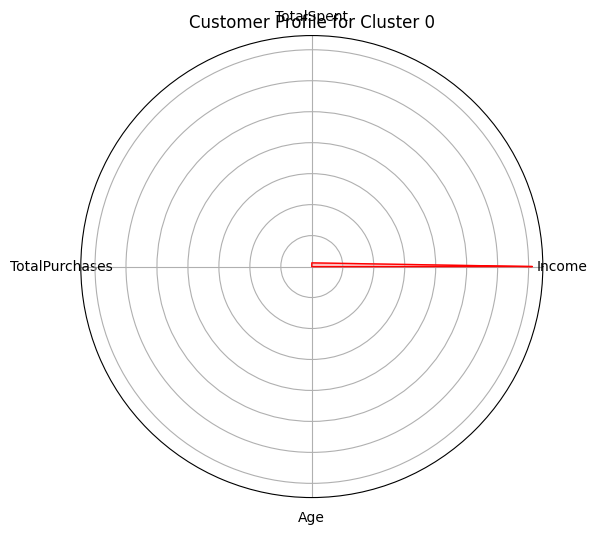

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Radar chart for a specific cluster
cluster_0 = df[df['Cluster'] == 0].mean()[['Income', 'TotalSpent', 'TotalPurchases', 'Age']]

# Prepare labels and values
labels = cluster_0.index.tolist()
values = cluster_0.values.tolist()

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]  # Close the radar chart
angles += angles[:1]  # Close the radar chart

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Customer Profile for Cluster 0')
plt.show()
